# Lab2: Clustering

In [1]:
import pandas as pd

import data

In [2]:
raw_data = pd.read_csv("dataset/raw_data.csv")
raw_data

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:43:49,119040676,2146,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,3572728,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:45:49,31408313,647,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,3573244,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:36:16,76350907,4,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,3573361,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:40:33,13621158,4,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


drop unusable column

In [3]:
data = raw_data.drop(["ID", "Flow.ID", "Timestamp"], axis=1)
data

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,10.200.7.196,39485,172.217.29.66,443,6,2021337,9,5,795,625,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,10.200.7.196,43024,179.1.4.244,443,6,65552,14,8,373,5252,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,10.200.7.196,43031,179.1.4.244,443,6,107032,14,12,373,10784,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,10.200.7.196,43064,179.1.4.244,443,6,75351,14,11,373,10784,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,10.200.7.196,43076,179.1.4.244,443,6,65862,15,13,373,11396,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,10.200.7.7,59979,172.16.255.183,53,17,119040676,2146,2138,80152,234873,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,10.200.7.7,59979,172.16.255.183,53,17,31408313,647,642,24421,65673,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,10.200.7.9,48859,172.16.255.200,53,17,76350907,4,0,180,0,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,10.200.7.9,48859,172.16.255.200,53,17,13621158,4,0,180,0,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


visualization before one hot encoding

array([[<AxesSubplot: title={'center': 'Flow.Duration'}>,
        <AxesSubplot: title={'center': 'Average.Packet.Size'}>]],
      dtype=object)

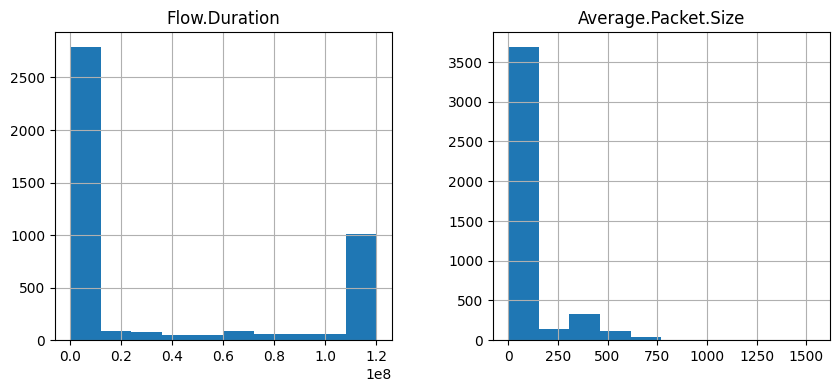

In [4]:
data[["Flow.Duration", "Average.Packet.Size"]].hist(figsize=(10, 4))

<AxesSubplot: xlabel='Protocol', ylabel='count'>

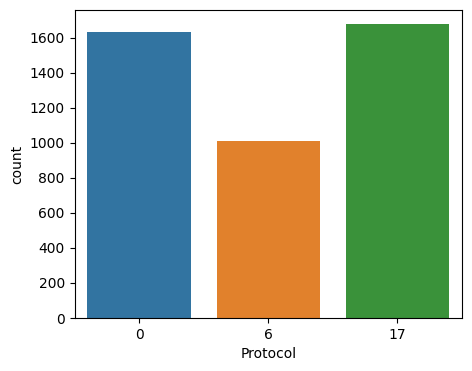

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

_, axes = plt.subplots(figsize=(5, 4))

sns.countplot(x="Protocol", data=data, ax=axes)

## Feature Engineering

Drop the attribute same within all instance

In [6]:
for header in data.columns:
    if len(data[header].value_counts()) == 1:
        data = data.drop(header, axis=1)
data

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
0,10.200.7.196,39485,172.217.29.66,443,6,2021337,9,5,795,625,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
1,10.200.7.196,43024,179.1.4.244,443,6,65552,14,8,373,5252,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
2,10.200.7.196,43031,179.1.4.244,443,6,107032,14,12,373,10784,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
3,10.200.7.196,43064,179.1.4.244,443,6,75351,14,11,373,10784,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
4,10.200.7.196,43076,179.1.4.244,443,6,65862,15,13,373,11396,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,10.200.7.7,59979,172.16.255.183,53,17,119040676,2146,2138,80152,234873,...,2145,20,0.0,0.0,0,0,0.0,0.0,0,0
4313,10.200.7.7,59979,172.16.255.183,53,17,31408313,647,642,24421,65673,...,646,20,0.0,0.0,0,0,0.0,0.0,0,0
4314,10.200.7.9,48859,172.16.255.200,53,17,76350907,4,0,180,0,...,3,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883
4315,10.200.7.9,48859,172.16.255.200,53,17,13621158,4,0,180,0,...,3,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083


nominal data

In [7]:
nominal_col = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Label']

for col in nominal_col:
    try:
        data[col] = data[col].astype(str)
    except Exception as e:
        print(e)
pd.get_dummies(data)
# too much data, ignore a part of nominal data first

'Label'


,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Destination.Port_55035,Destination.Port_56147,Destination.Port_56224,Destination.Port_56342,Destination.Port_57429,Destination.Port_59658,Destination.Port_59979,Protocol_0,Protocol_17,Protocol_6
0,2021337,9,5,795,625,487,0,88.333333,166.426410,482,...,0,0,0,0,0,0,0,0,0,1
1,65552,14,8,373,5252,223,0,26.642857,69.221614,1436,...,0,0,0,0,0,0,0,0,0,1
2,107032,14,12,373,10784,223,0,26.642857,69.221614,1436,...,0,0,0,0,0,0,0,0,0,1
3,75351,14,11,373,10784,223,0,26.642857,69.221614,2660,...,0,0,0,0,0,0,0,0,0,1
4,65862,15,13,373,11396,223,0,24.866667,67.057403,1436,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,119040676,2146,2138,80152,234873,66,27,37.349487,5.245217,342,...,0,0,0,0,0,0,0,0,1,0
4313,31408313,647,642,24421,65673,69,27,37.744977,6.118404,331,...,0,0,0,0,0,0,0,0,1,0
4314,76350907,4,0,180,0,45,45,45.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
4315,13621158,4,0,180,0,45,45,45.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0


drop ip and port

In [8]:
data = data.drop(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Label'], axis=1, errors='ignore')
data

,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
0,6,2021337,9,5,795,625,487,0,88.333333,166.426410,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
1,6,65552,14,8,373,5252,223,0,26.642857,69.221614,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
2,6,107032,14,12,373,10784,223,0,26.642857,69.221614,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
3,6,75351,14,11,373,10784,223,0,26.642857,69.221614,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
4,6,65862,15,13,373,11396,223,0,24.866667,67.057403,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,17,119040676,2146,2138,80152,234873,66,27,37.349487,5.245217,...,2145,20,0.0,0.0,0,0,0.0,0.0,0,0
4313,17,31408313,647,642,24421,65673,69,27,37.744977,6.118404,...,646,20,0.0,0.0,0,0,0.0,0.0,0,0
4314,17,76350907,4,0,180,0,45,45,45.000000,0.000000,...,3,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883
4315,17,13621158,4,0,180,0,45,45,45.000000,0.000000,...,3,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083


Set ignore column for preprocessing

In [9]:
nominal_col = ['Protocol', 'Label']
numeric_data = data.drop(nominal_col, axis=1, errors='ignore')

Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tf_data = scaler.fit_transform(numeric_data)
tf_data = pd.DataFrame(tf_data, columns=numeric_data.columns)
tf_data

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
0,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,0.047784,0.048204,0.023777,...,0.000834,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
1,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,0.014413,0.020049,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
2,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
3,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.131215,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,0.013452,0.019422,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.447341,0.733448,0.239550,0.049175,0.004822,0.09375,0.020204,0.001519,0.016871,...,0.447341,0.428571,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4313,0.261736,0.134724,0.220240,0.072987,0.013750,0.005041,0.09375,0.020418,0.001772,0.016328,...,0.134724,0.428571,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4314,0.636258,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0.000626,0.428571,9.008458e-09,0.0,9.008458e-09,9.008458e-09,0.637175,0.0,0.637175,0.637175
4315,0.113510,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0.000626,0.428571,9.008458e-09,0.0,9.008458e-09,9.008458e-09,0.113673,0.0,0.113673,0.113673


In [11]:
for col in nominal_col:
    if data.get(col) is None: continue
    tf_data[col] = data[col].astype(str)
tf_data = pd.get_dummies(tf_data)
tf_raw_data = tf_data.copy()
tf_data

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Protocol_0,Protocol_17,Protocol_6
0,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,0.047784,0.048204,0.023777,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,0,1
1,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,0.014413,0.020049,0.070837,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,0,1
2,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.070837,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,0,1
3,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.131215,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,0,1
4,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,0.013452,0.019422,0.070837,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.447341,0.733448,0.239550,0.049175,0.004822,0.09375,0.020204,0.001519,0.016871,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,1,0
4313,0.261736,0.134724,0.220240,0.072987,0.013750,0.005041,0.09375,0.020418,0.001772,0.016328,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0,1,0
4314,0.636258,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0.0,9.008458e-09,9.008458e-09,0.637175,0.0,0.637175,0.637175,0,1,0
4315,0.113510,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0.0,9.008458e-09,9.008458e-09,0.113673,0.0,0.113673,0.113673,0,1,0


In [12]:
ans = pd.read_csv("dataset/cluster.csv")
ans

,ID,Cluster
0,1651,0
1,6460,0
2,6578,0
3,7219,0
4,7683,0
...,...,...
4312,3572701,3
4313,3572728,3
4314,3573244,3
4315,3573361,3


In [361]:
ans["Cluster"].value_counts()

3    1695
2    1631
0     856
1     135
Name: Cluster, dtype: int64

Feature selection

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from random import sample

features = tf_data.columns.copy()
features = sample(list(features), len(features))

print(features)

selected = []
score = 0

i = 0

while(i < len(features)):
    f = features[i]
    selected.append(f)
    y = KMeans(n_clusters=4).fit_predict(tf_data[selected])
    new_score = adjusted_mutual_info_score(ans['Cluster'], y)
    print(new_score)
    if new_score > score:
        score = new_score
        features.remove(f)
        i = 0
    else:
        selected.remove(f)
    i += 1

selected

['Init_Win_bytes_forward', 'FIN.Flag.Count', 'Idle.Min', 'SYN.Flag.Count', 'Protocol_6', 'Fwd.Packet.Length.Mean', 'Bwd.IAT.Max', 'Total.Length.of.Fwd.Packets', 'Bwd.Header.Length', 'Avg.Bwd.Segment.Size', 'Fwd.IAT.Total', 'Active.Mean', 'Protocol_17', 'Fwd.Packet.Length.Min', 'Flow.IAT.Mean', 'Subflow.Bwd.Bytes', 'Fwd.IAT.Mean', 'Flow.IAT.Max', 'Bwd.Packet.Length.Std', 'Idle.Max', 'Packet.Length.Mean', 'Bwd.Packets.s', 'Idle.Std', 'Active.Min', 'Subflow.Fwd.Bytes', 'Total.Length.of.Bwd.Packets', 'Packet.Length.Std', 'Flow.Bytes.s', 'Active.Max', 'Fwd.Packet.Length.Std', 'Packet.Length.Variance', 'Active.Std', 'URG.Flag.Count', 'Bwd.Packet.Length.Max', 'Fwd.IAT.Max', 'Flow.IAT.Min', 'Bwd.IAT.Total', 'act_data_pkt_fwd', 'Idle.Mean', 'ACK.Flag.Count', 'Fwd.Packet.Length.Max', 'PSH.Flag.Count', 'Total.Fwd.Packets', 'Bwd.Packet.Length.Min', 'Protocol_0', 'Bwd.IAT.Std', 'Bwd.Packet.Length.Mean', 'Init_Win_bytes_backward', 'Fwd.IAT.Min', 'Flow.IAT.Std', 'Subflow.Fwd.Packets', 'Down.Up.Ratio'

['Init_Win_bytes_forward',
 'Protocol_6',
 'Total.Length.of.Fwd.Packets',
 'Idle.Min',
 'Fwd.Packet.Length.Mean',
 'Bwd.Header.Length',
 'Fwd.IAT.Total',
 'SYN.Flag.Count',
 'Avg.Bwd.Segment.Size',
 'Protocol_17',
 'Bwd.IAT.Max',
 'Flow.IAT.Mean',
 'Flow.IAT.Max',
 'Subflow.Bwd.Bytes',
 'Down.Up.Ratio']

PCA analysis

In [14]:
from sklearn.decomposition import PCA
import re

numerical = []
for f in selected:
    if re.match(".Protocol.", f): continue
    numerical.append(f)
df_to_analyze = tf_data[numerical]
pca = PCA(n_components=0.95)
pc = pca.fit_transform(df_to_analyze)
data_with_pca = pd.DataFrame(pc)
data_with_pca

,0,1,2,3,4,5
0,-0.738330,0.512774,-0.118639,-0.079451,0.016153,0.049059
1,-0.758036,0.542110,-0.156973,-0.137622,-0.020253,-0.058031
2,-0.762383,0.560007,-0.168984,-0.162507,-0.038277,-0.104684
3,-0.764253,0.565745,-0.173490,-0.170755,-0.044495,-0.120764
4,-0.762055,0.558234,-0.168011,-0.160546,-0.036333,-0.100396
...,...,...,...,...,...,...
4312,1.058923,0.239746,0.187066,-0.222435,0.178662,0.095175
4313,0.541939,-0.116996,-0.360378,0.028976,0.048695,-0.025309
4314,0.707901,0.130176,-0.008840,0.722623,-0.446197,-0.021187
4315,0.413863,-0.189061,-0.462691,0.239470,-0.078526,-0.058019


In [15]:
for col in nominal_col:
    if data.get(col) is None: continue
    data_with_pca[col] = data[col].astype(str)
tf_data = pd.get_dummies(data_with_pca)
tf_data

,0,1,2,3,4,5,Protocol_0,Protocol_17,Protocol_6
0,-0.738330,0.512774,-0.118639,-0.079451,0.016153,0.049059,0,0,1
1,-0.758036,0.542110,-0.156973,-0.137622,-0.020253,-0.058031,0,0,1
2,-0.762383,0.560007,-0.168984,-0.162507,-0.038277,-0.104684,0,0,1
3,-0.764253,0.565745,-0.173490,-0.170755,-0.044495,-0.120764,0,0,1
4,-0.762055,0.558234,-0.168011,-0.160546,-0.036333,-0.100396,0,0,1
...,...,...,...,...,...,...,...,...,...
4312,1.058923,0.239746,0.187066,-0.222435,0.178662,0.095175,0,1,0
4313,0.541939,-0.116996,-0.360378,0.028976,0.048695,-0.025309,0,1,0
4314,0.707901,0.130176,-0.008840,0.722623,-0.446197,-0.021187,0,1,0
4315,0.413863,-0.189061,-0.462691,0.239470,-0.078526,-0.058019,0,1,0


## Clustering

#### Prepare: read in ground truth

### KMeans

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(tf_data)

cluster_labels = pd.DataFrame(kmeans.labels_)
cluster_labels

d:\Project\MLFN\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0
0,0
1,0
2,0
3,0
4,0
...,...
4312,3
4313,2
4314,3
4315,2


In [17]:
from sklearn.metrics import adjusted_mutual_info_score

adjusted_mutual_info_score(ans["Cluster"], cluster_labels[0])

0.7997324716434443

### DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10)
db.fit(tf_data)

dbscan_labels = pd.DataFrame(db.labels_)
dbscan_labels

d:\Project\MLFN\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0
0,0
1,0
2,0
3,0
4,0
...,...
4312,2
4313,2
4314,2
4315,2


In [19]:
adjusted_mutual_info_score(ans["Cluster"], dbscan_labels[0])

0.8529027133259797

### Autoencoder

In [592]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import RMSprop

def create_autoencoder(dims):
    n_stacks = len(dims) - 1

    # input
    input_layer = Input(shape=(dims[0],), name='input')
    x = input_layer

    # encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation='relu', kernel_initializer='glorot_uniform', name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer='glorot_uniform', name='encoder_%d' % (n_stacks - 1))(x)

    x = encoded

    # decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation='relu', kernel_initializer='glorot_uniform', name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer='glorot_uniform', name='decoder_0')(x)
    decoded = x

    return Model(inputs=input_layer, outputs=decoded, name='AE'), Model(inputs=input_layer, outputs=encoded, name='encoder')

In [593]:
autoencoder, encoder = create_autoencoder((tf_raw_data.shape[-1], 100, 100, 4))
autoencoder.compile(loss='mse', optimizer=RMSprop(learning_rate=1e-5))
autoencoder.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 68)]              0         
                                                                 
 encoder_0 (Dense)           (None, 100)               6900      
                                                                 
 encoder_1 (Dense)           (None, 100)               10100     
                                                                 
 encoder_2 (Dense)           (None, 4)                 404       
                                                                 
 decoder_2 (Dense)           (None, 100)               500       
                                                                 
 decoder_1 (Dense)           (None, 100)               10100     
                                                                 
 decoder_0 (Dense)           (None, 68)                6868     

In [594]:
autoencoder.fit(tf_raw_data, tf_raw_data, batch_size=16, epochs=10)
autoencoder.save_weights('ae_weights.h5')

Epoch 1/10
270/270 [==============================] - 1s 1ms/step - loss: 0.0411
Epoch 2/10
270/270 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 3/10
270/270 [==============================] - 0s 987us/step - loss: 0.0352
Epoch 4/10
270/270 [==============================] - 0s 977us/step - loss: 0.0315
Epoch 5/10
270/270 [==============================] - 0s 924us/step - loss: 0.0275
Epoch 6/10
270/270 [==============================] - 0s 958us/step - loss: 0.0235
Epoch 7/10
270/270 [==============================] - 0s 955us/step - loss: 0.0201
Epoch 8/10
270/270 [==============================] - 0s 922us/step - loss: 0.0171
Epoch 9/10
270/270 [==============================] - 0s 911us/step - loss: 0.0147
Epoch 10/10
270/270 [==============================] - 0s 917us/step - loss: 0.0128


Load weight

In [595]:
autoencoder.load_weights("ae_weights.h5")

predict

In [596]:
y_encoded = encoder.predict(tf_raw_data)
y_encoded

135/135 [==============================] - 0s 552us/step


array([[ 1.4364822 , -0.19436797, -0.09636088, -0.33372858],
       [ 1.5739169 , -0.21279165, -0.03598484, -0.4343122 ],
       [ 1.6561197 , -0.2182428 , -0.02001249, -0.47303176],
       ...,
       [ 1.0168089 , -1.2570014 , -0.51337737,  0.54385877],
       [ 0.57789814, -0.74615484,  0.0029462 ,  0.44094005],
       [ 1.2785265 , -1.4757785 , -0.7568975 ,  0.63322353]],
      dtype=float32)

In [597]:
import random
# y_pred = DBSCAN(eps=0.5, min_samples=10).fit_predict(y_encoded)
y_pred = KMeans(n_clusters=4, n_init=10, random_state=random.randint(0, 100)).fit_predict(y_encoded)
y_pred

array([3, 3, 3, ..., 0, 0, 1])

In [598]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

2    1626
1    1116
0     841
3     734
dtype: int64

In [599]:
adjusted_mutual_info_score(ans["Cluster"], y_pred[0])

0.7319216912874081